Автоэнкодеры. Что это и как работают | #27 нейросети на Python

In [9]:

import numpy as np
import os
from tensorflow import keras
from tensorflow.keras.layers import Dense, SimpleRNN, Input, Embedding,LSTM, GRU, Flatten, Dropout, Bidirectional, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [13]:
input_img = Input((28, 28, 1))

x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
encoded = Dense(49, activation='relu')(x)

d = Dense(64, activation='relu')(encoded)
d = Dense(28*28, activation='sigmoid')(d)
decoded = Reshape((28, 28, 1))(d)

autoencoder = keras.Model(input_img, decoded, name='autoencoder')
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
bath_size = 100

autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=bath_size,
    shuffle=True,
)

Epoch 1/20


2025-01-03 23:36:55.934350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0746
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1081
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1074
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1044
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1005
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1000
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0994
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0993
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0988
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0985
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0983
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0984
Epoch 13/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0982
Epoch 14/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0984
Epoch 15/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0995


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


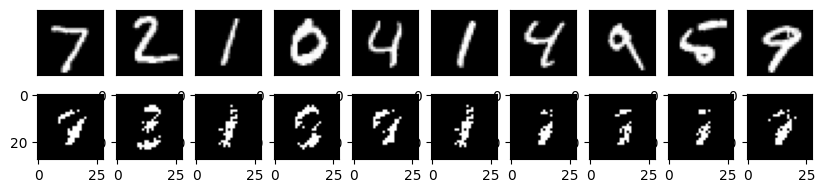

In [16]:
n = 10 
imgs = x_test[:n]
decoded_imgs = autoencoder.predict(x_test[:n], batch_size=n)

plt.figure(figsize=(n, 2))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(imgs[i].squeeze(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax2 = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)